# Linear Regression: from math concepts to implementation

Linear Regression goal is to fit a straight line to the data, trying to capture what is the trend of the data. <br>
In this article we will start with a quick intuitive walk-through of the mathematics behind this well-known problem and we will implement the whole algorithm from scratch. Of course there are already many libraries that implement linear regression, but our goal is to understand how linear regression works and I found that the best way to do that is to implement it from scratch.<br>
In this article we will only explain how to fit a **straight line** to the data. In the next article we will explain also how to fit data that has not a linear  trend by creating non-linear model. So stay tuned!

Let's look into some math aspetcs and then proceed to implementation!

The objective of linear regression is to minimize the cost function:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

where the hypothesis $h_\theta$ is given by the linear model:

$$ h_\theta = \theta^T x = \theta_0 + \theta_1 x_1 $$

The model's parameters are the $\theta_j$ values. These are the values that need to be adjusted to minimize cost $J(\theta)$.
One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update:

$$\theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$ (simultaneously update $\theta_j$ for all $j$);
With each step of gradient descent, the parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

## Linear Regression with one variable

In this part we will implement linear regression with one variable to predict profits for a food truck. Suppose you are a CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from cities. You would like to use this data to help you select which city to exapend to next.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 12)

data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize it since it has only two properties to plot (profit and population). Nevertheless, many other problems that you will encounter in real life are multi-dimensional and therefore can't be plotted on a 2-d plot.

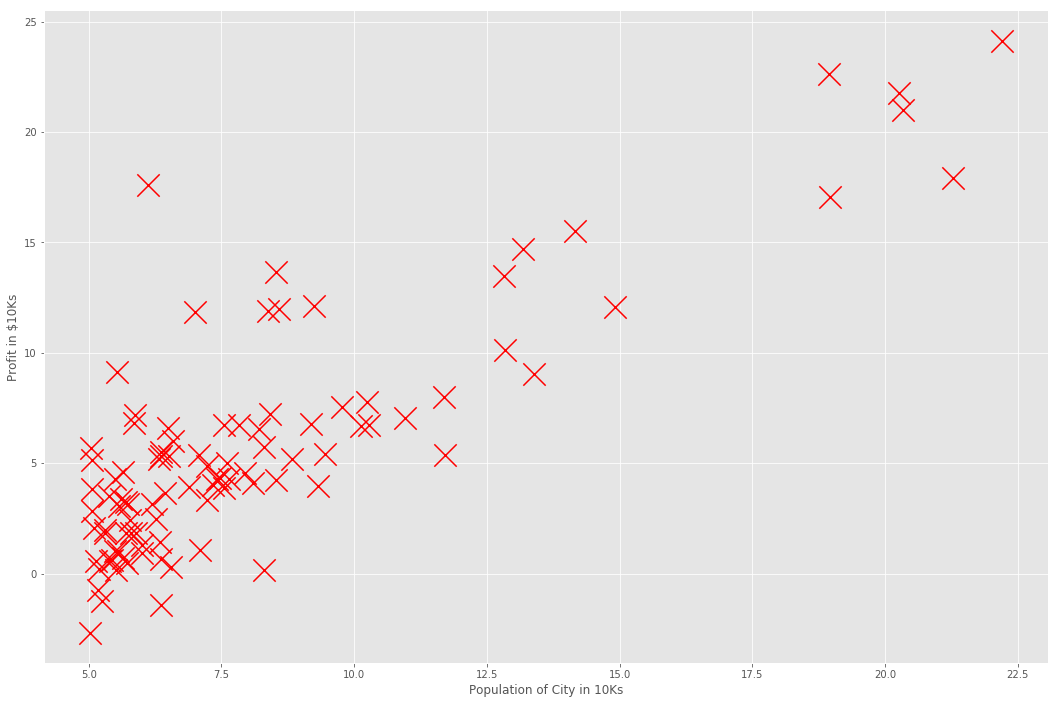

In [46]:
# create figure
fig = plt.figure()
# adjust figure's size
ax = fig.add_subplot(1, 1, 1) 
# plot X data and the relative labels y
#ax.plot(X, y, 'x', markersize=15, linewidth=7)
ax.scatter(X, y, s=500, marker='x',color='r',linewidths=8)
# set label y
plt.ylabel('Profit in $10Ks')
# set label x 
plt.xlabel('Population of City in 10Ks')
# show the figure
plt.show()

## Functions

#### Computing the cost $J(\theta)$ and Gradient Descent Algorithm

In [47]:
def computeCost(X, y, theta):
    return (1/(2*y.size))*sum((np.dot(theta.T, X.T).T-y)**2)

def gradientDescent(X, y, theta, alpha, iterations):
    m = y.shape[0]
    J_history = np.zeros((iterations, 1))
    for i in range(iterations):
        hypothesis_minus_y = (np.matmul(theta.T, X.T).T-y).T
        theta = (theta.T - (alpha/m)*(np.matmul(hypothesis_minus_y, X))).T
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

#### Running Linear Model

In [48]:
# y need to be shaped from (97,) to (97, 1)
y = y.reshape(y.shape[0], 1)
# it is not necessarily to reshape X since we add the intercept term and X become already right shaped into (97, 2)
#X = X.reshape(X.shape[0], 1)
X = np.c_[np.ones(X.shape[0]), X] # adding column of ones to X to account for theta_0 (the intercept)

In [49]:
theta = np.array([[0, 0]]).T
iterations = 1500
alpha = 0.01
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: intercept={0}, slope={1}".format(theta[0],theta[1]))

Theta found by gradient descent: intercept=[-3.63029144], slope=[1.16636235]


#### Visualize the cost

After you performed gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. You should see that the cost $J(\theta)$ is not-increasing at each iteration.

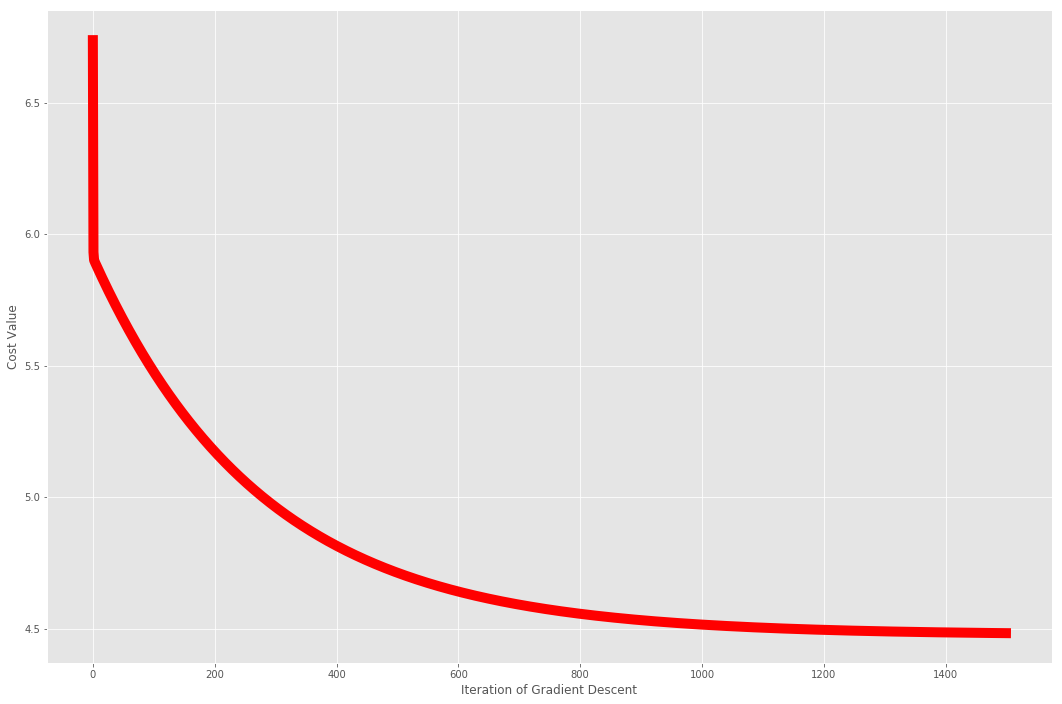

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(iterations), J_history, linewidth=10, c='r')
plt.ylabel('Cost Value')
plt.xlabel('Iteration of Gradient Descent')
plt.show()

#### Plot the result

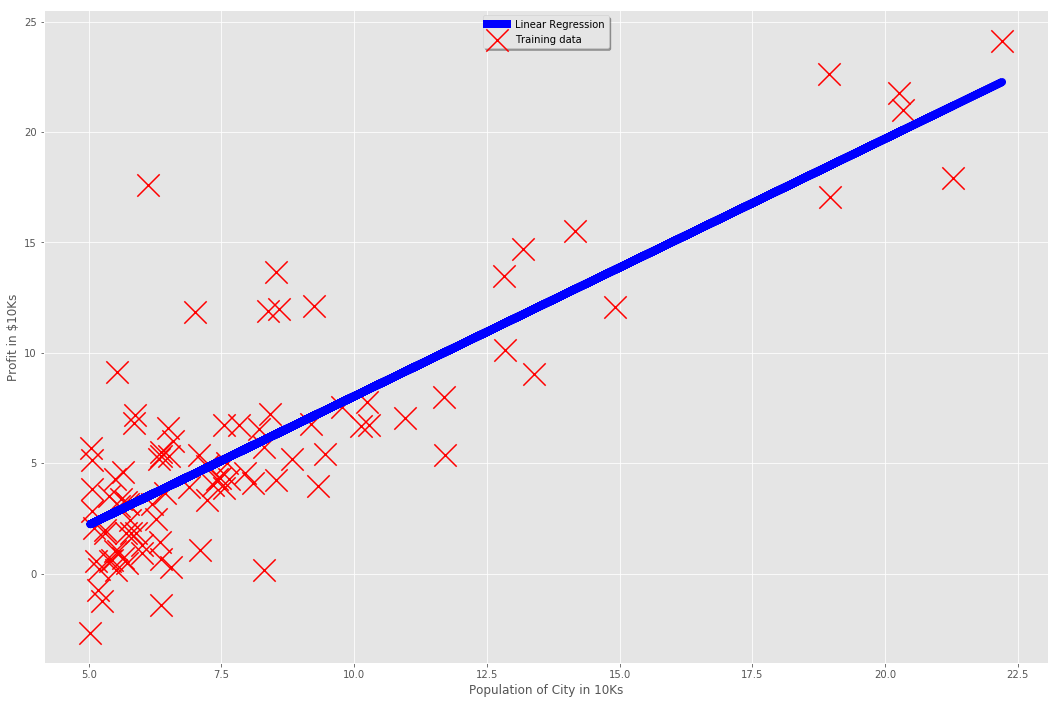

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
# plot X data and the relative labels y
#ax.plot(X[:, 1], y[:, 0], 'x', label='Training Data')
ax.scatter(X[:, 1], y[:, 0], s=500, marker='x',color='r',linewidths=8, label='Training data')
# plot the hypotesis line h = theta0*X[:, 0] + theta1*X[:, 1] 
ax.plot(X[:,1], np.matmul(X, theta), linestyle='-', label='Linear Regression', linewidth=8, c='b')
# set the legend for the labels: 'Training Data' and 'Linear Regression'
legend = ax.legend(loc='upper center', shadow=True)
plt.ylabel('Profit in $10Ks')
plt.xlabel('Population of City in 10Ks')
plt.show()

### Make prediction

In [77]:
predict1 = np.matmul(np.array([[1, 3.5]]), theta)
print("For a population of 35000, we predict a profict of: ", round(predict1[0][0] * 10000), "$")

For a population of 35000, we predict a profict of:  4520.0 $


In [78]:
predict2 = np.matmul(np.array([[1, 7]]), theta)
print("For a population of 70000, we predict a profict of: ", round(predict2[0][0] * 10000), "$")

For a population of 70000, we predict a profict of:  45342.0 $


## Linear Regression with multiple variable

In this part, we will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent sold and make a model of housing prices.
We will consider now a dataset containing a training set of housing prices in Portland, Oregon.
The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [60]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
y = y.reshape(y.shape[0], 1)

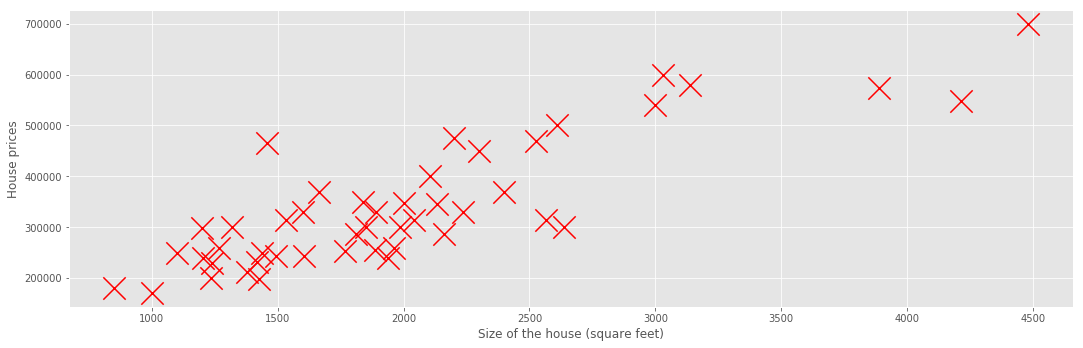

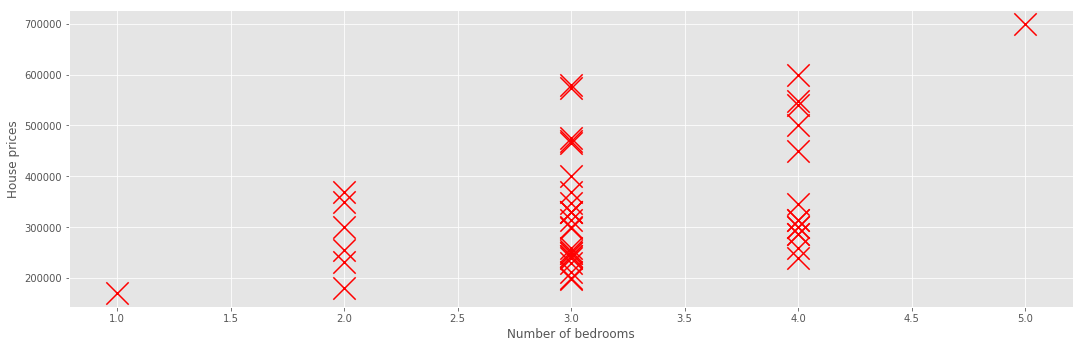

In [62]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) 
ax.scatter(X[:, 0], y, s=500, marker='x',color='r',linewidths=8)
plt.ylabel('House prices')
plt.xlabel('Size of the house (square feet)')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) 
ax.scatter(X[:, 1], y, s=500, marker='x',color='r',linewidths=8)
plt.ylabel('House prices')
plt.xlabel('Number of bedrooms')
plt.show()

By looking at the values, note that house size are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient decent converge much more quikly.

In [81]:
def featureNormalize(X):
    average = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - average)/sigma
    return X_norm, average, sigma

In [82]:
X, average, sigma = featureNormalize(X)

#### Running Gradient Descent

In [83]:
alpha = 0.01
interations = 1500
# adding the intercept
X = np.c_[np.ones(X.shape[0]), X]

theta = np.zeros((X.shape[1], 1))
theta, J_history = gradientDescent(X, y, theta, alpha,  interations)
print("Theta found by gradient descent: intercept={0}, slope1={1}, slope2={2} ".format(theta[0],theta[1],theta[2]))

Theta found by gradient descent: intercept=[340412.56301439], slope1=[109370.05670466], slope2=[-6500.61509507] 


#### Visualizing the convergence graph

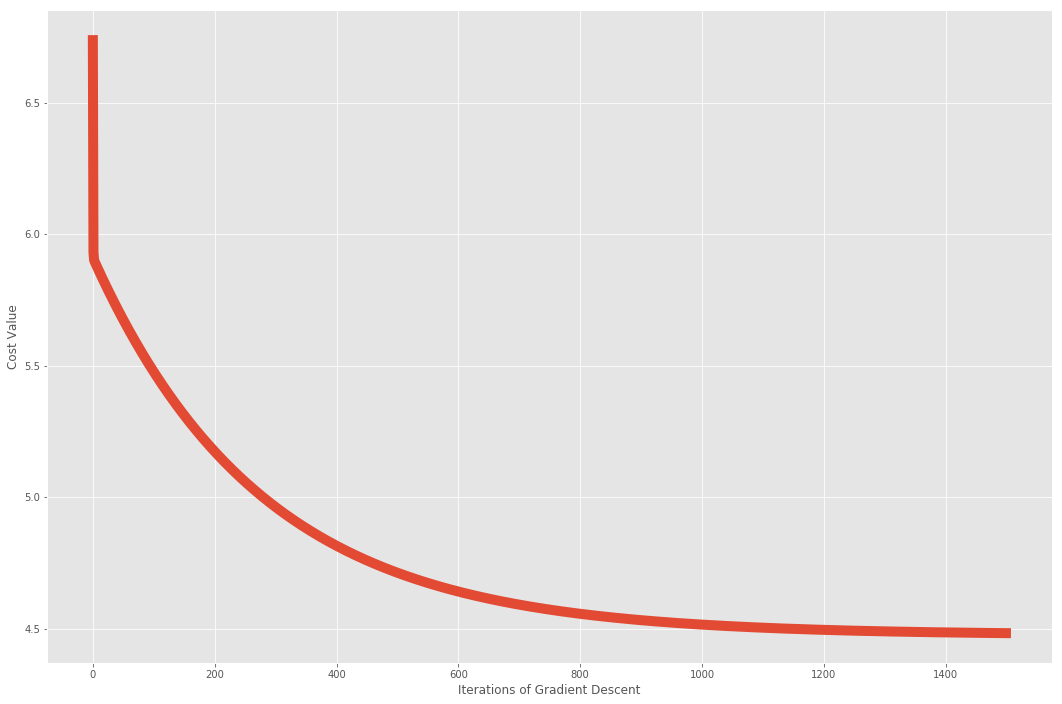

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(iterations), J_history, linewidth=10)
plt.ylabel('Cost Value')
plt.xlabel('Iterations of Gradient Descent')
plt.show()

### Make Prediction
Estimate the price of a 1650 sq-ft, 3 bedrooms house:


In [85]:
new_data = np.array([[1650, 3]])
# first need to normalize our data
new_data = (new_data - average) / sigma

In [86]:
# adding the intercept
new_data = np.c_[np.array([1]), new_data]

In [87]:
print("Estimated price for a house of 1650 sq-ft and 3 bedrooms: ", np.dot(new_data, theta)[0][0], "$")

Estimated price for a house of 1650 sq-ft and 3 bedrooms:  293098.4666757651 $


## Normal Equation

It is possible to show that the same optimized parameters found with Gradient Descent can be calculated in an elegant, efficient and closed form, using linear algebra. Specifically:
$$\theta = (X^T X)^{-1} X^Ty$$
Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.
This equation is preferred that Gradient Descent when the dataset is < 10000, otherwise Gradient Descent is preferred since it will converge faster. Furthermore, if the $X^T X$ does not admit inverse, this method cannot be applied.

In [88]:
def normalEquation(X, y):
    XTX_inv= np.linalg.inv(np.matmul(X.T, X))
    XTy = np.matmul(X.T, y)
    theta = np.matmul(XTX_inv, XTy)
    return theta

In [89]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
y = y.reshape(y.shape[0], 1)

In [90]:
# adding the intercept
X = np.c_[np.ones(X.shape[0]), X]

In [91]:
theta = normalEquation(X, y)
print("Theta found by gradient descent: intercept={0}, slope1={1}, slope2={2} ".format(theta[0],theta[1],theta[2]))

Theta found by gradient descent: intercept=[89597.9095428], slope1=[139.21067402], slope2=[-8738.01911233] 


In [92]:
new = np.array([[1, 1650, 3]])
print("Estimated price for a house of 1650 sq-ft and 3 bedrooms: ", np.dot(new, theta)[0][0], "$")

Estimated price for a house of 1650 sq-ft and 3 bedrooms:  293081.4643348931 $


As you can notice, we obtained a predicted value very similar to the value we got earlier using Gradient Descent, which is: 293098.4666757651 $.

## Compare our implementation to sklearn

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
y = y.reshape(y.shape[0], 1)

In [95]:
# adding the intercept term
X = np.c_[np.ones(X.shape[0]), X]

In [96]:
# create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training set
regr.fit(X, y)

# make prediction
y_pred_regr = regr.predict(X)

**theta** are the parameters we found before with Normal Equation.

In [97]:
# compare sklearn with my implementation using mean_squared_error
error = mean_squared_error(np.matmul(X, theta), y_pred_regr)
print("Error between my implementation and sklearn implementation is: ", error)

Error between my implementation and sklearn implementation is:  9.454185273745276e-18


You can see that the mean squared error is really small! Great!